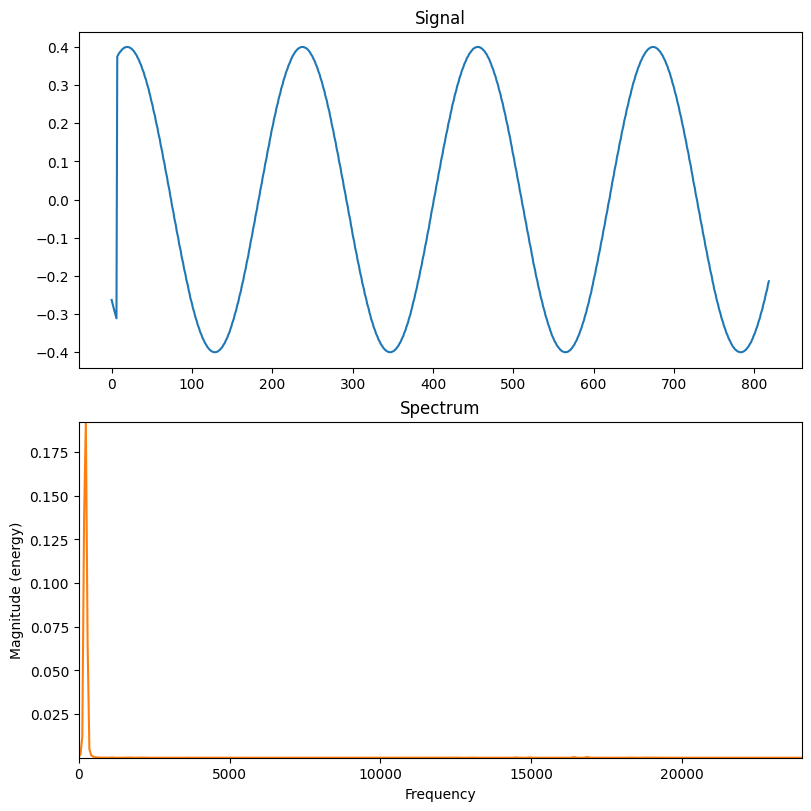

In [4]:
import matplotlib.pyplot as plt
import re
import numpy as np
from numpy import fft

INPUT_BYTES = 4
SAMPLE_RATE = 48e3

data = open('/mnt/c/users/PYJOHN/Downloads/data.csv', 'r', encoding='utf8').read(40000)
data = re.findall('"I2S / PCM",\d,([\d-]+)', data)

data = list(map(
    lambda n: int.from_bytes(int(n).to_bytes(length=INPUT_BYTES, byteorder='big', signed=True), byteorder='big', signed=True) / (2 ** (8 * INPUT_BYTES) / 2),
    data[::2]
))

# data =  [0, 0, 2036, 2036, 4074, 4074, 6104, 6104, 8115, 8115, 10097, 10097, 12042, 12042, 13939, 13939, 15782, 15782, 17562, 17562, 19272, 19272, 20904, 20904, 22452, 22452, 23910, 23910, 25272, 25272, 26533, 26533, 27688, 27688, 28734, 28734, 29665, 29665, 30479, 30479, 31173, 31173, 31744, 31744, 32190, 32190, 32510, 32510, 32702, 32702, 32767, 32767, 32702, 32702, 32510, 32510, 32190, 32190, 31744, 31744, 31173, 31173, 30479, 30479, 29665, 29665, 28734, 28734, 27688, 27688, 26533, 26533, 25272, 25272, 23910, 23910, 22452, 22452, 20904, 20904, 19272, 19272, 17562, 17562, 15782, 15782, 13939, 13939, 12042, 12042, 10097, 10097, 8115, 8115, 6104, 6104, 4074, 4074, 2036, 2036, 0, 0, 63500, 63500, 61462, 61462, 59432, 59432, 57421, 57421, 55439, 55439, 53494, 53494, 51597, 51597, 49754, 49754, 47974, 47974, 46264, 46264, 44632, 44632, 43084, 43084, 41626, 41626, 40264, 40264, 39003, 39003, 37848, 37848, 36802, 36802, 35871, 35871, 35057, 35057, 34363, 34363, 33792, 33792, 33346, 33346, 33026, 33026, 32834, 32834, 32769, 32769, 32834, 32834, 33026, 33026, 33346, 33346, 33792, 33792, 34363, 34363, 35057, 35057, 35871, 35871, 36802, 36802, 37848, 37848, 39003, 39003, 40264, 40264, 41626, 41626, 43084, 43084, 44632, 44632, 46264, 46264, 47974, 47974, 49754, 49754, 51597, 51597, 53494, 53494, 55439, 55439, 57421, 57421, 59432, 59432, 61462, 61462, 63500, 63500]

fig = plt.figure(figsize=(8, 8), layout='constrained')
axs = fig.subplot_mosaic([['signal'], ['spectrum']])

axs['signal'].set_title('Signal')
axs['signal'].plot(data, color='C0')

axs['spectrum'].set_title('Spectrum')
axs['spectrum'].autoscale(tight=True)
# axs['spectrum'].set_xlim(200, 500)
# axs['spectrum'].set_xticks(np.arange(200, 500, 10))
axs['spectrum'].magnitude_spectrum(data, Fs=SAMPLE_RATE, color='C1')

plt.show()
